In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.colors as clr
import seaborn as sns
from statannot import add_stat_annotation
from rich.progress import track

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
os.chdir(
    "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_D to organization_exclude hypothesis/crowding_aging_Hela"
)
data = pd.read_csv("N_and_Fraction_per_replicate.csv")

lst_labels = [
    "0Dex, -, 0h",
    "0Dex, -, 3h",
    "0Dex, -, 6h",
    "0Dex, -, 8h",
    "0Dex, Hela, 0h",
    "10Dex, -, 0h",
    "10Dex, -, 3h",
    "10Dex, -, 6h",
    "10Dex, -, 8h",
    "10Dex, Hela, 0h",
]

color_palette = [
    "#9b2226",
    "#8d2a2e",
    "#582326",
    "#333232",
]

In [3]:
N_total = data["N, Total"].to_numpy(int)
N_mobile = data["N, Mobile"].to_numpy(int)
N_static = N_total - N_mobile
N_constrained = data["N, Constrained"].to_numpy(int)
N_normal = N_mobile - N_constrained

# frac_static = N_static / N_total
# frac_constrained = N_constrained / N_total
# frac_normal = N_normal / N_total

# data["Static"] = frac_static
# data["Constrained"] = frac_constrained
# data["Normal"] = frac_normal

# New constrained includes static ones
frac_constrained = 1 - (N_normal / N_total)
data["Constrained"] = frac_constrained

#### Colors

In [7]:
cmap_color_end = "#00274C"
cmap_color_start = "#FFCB05"
cmap_name = "maize2blue"
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name, [cmap_color_start, cmap_color_end], N=8
)
palette_1 = [
    "#848482",
    cmap(0 / 8),
    cmap(3 / 8),
    cmap(6 / 8),
    cmap(8 / 8),
]

#### Aging, no Dextran

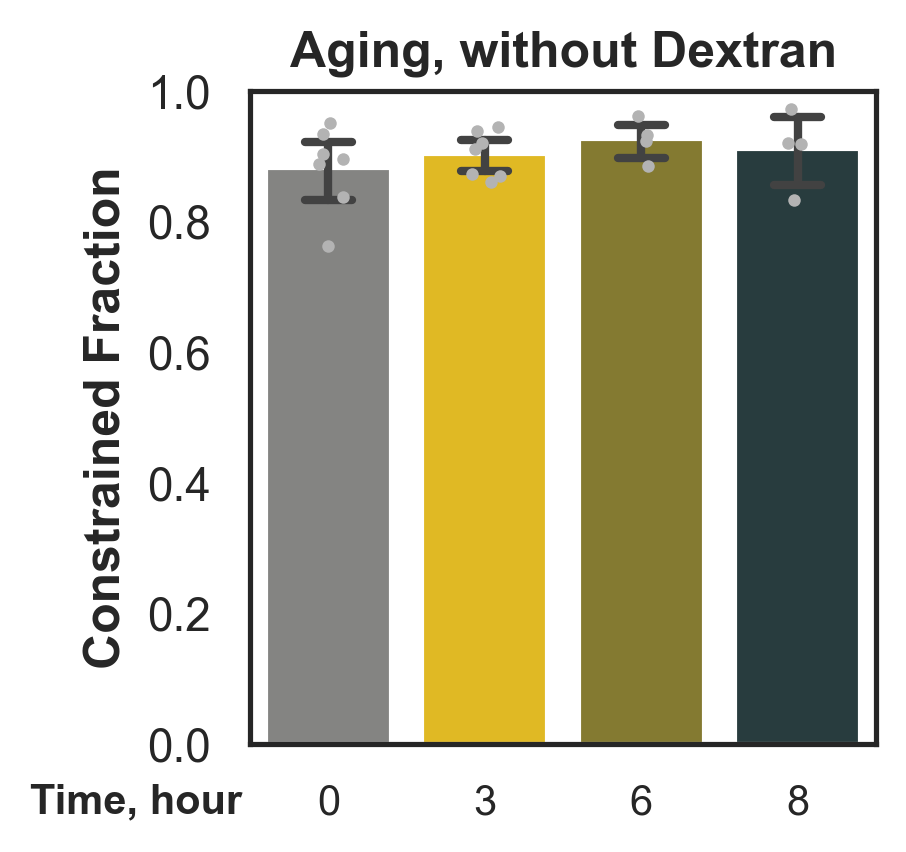

In [14]:
fig = plt.figure(figsize=(3, 3), dpi=300)
labels = [
    "0Dex, -, 0h",
    "0Dex, -, 3h",
    "0Dex, -, 6h",
    "0Dex, -, 8h",
]
df_fractions = data[data["label"].isin(labels)][["label", "Constrained"]]

ax = sns.barplot(
    data=df_fractions,
    x="label",
    y="Constrained",
    palette=palette_1,
    errorbar="ci",
    errwidth=2,
    capsize=0.3,
)
ax = sns.stripplot(
    data=df_fractions,
    x="label",
    y="Constrained",
    color="0.7",
    size=3,
)
plt.title("Aging, without Dextran", weight="bold")
plt.ylim(0, 1)
plt.ylabel(r"Constrained Fraction", weight="bold")
fig.text(0, 0.07, "Time, hour", fontsize=10, weight="bold")

ax.set_xticklabels(["0", "3", "6", "8"])
ax.xaxis.set_tick_params(labelsize=10, labelrotation=0)
plt.xlabel("")
plt.tight_layout()
plt.savefig("Fig3_Fconstrained_aging_noDex.png", format="png", bbox_inches="tight")
plt.show()

#### Aging, 10% Dextran

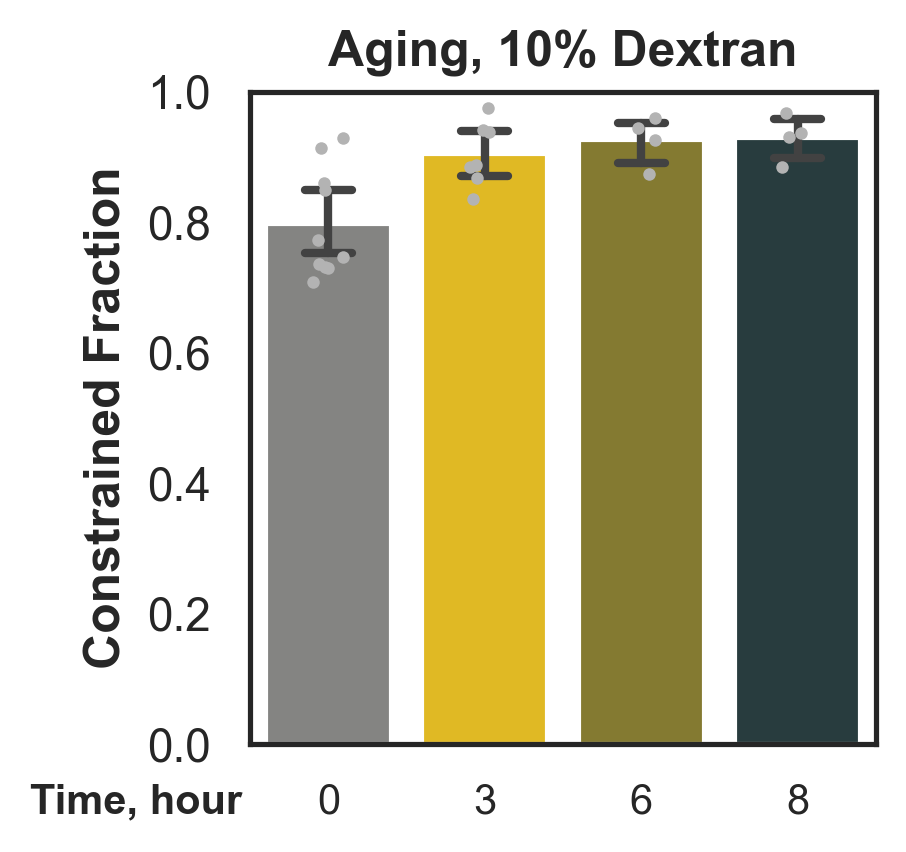

In [16]:
fig = plt.figure(figsize=(3, 3), dpi=300)
labels = [
    "10Dex, -, 0h",
    "10Dex, -, 3h",
    "10Dex, -, 6h",
    "10Dex, -, 8h",
]
df_fractions = data[data["label"].isin(labels)][["label", "Constrained"]]

ax = sns.barplot(
    data=df_fractions,
    x="label",
    y="Constrained",
    palette=palette_1,
    errorbar="ci",
    errwidth=2,
    capsize=0.3,
)
ax = sns.stripplot(
    data=df_fractions,
    x="label",
    y="Constrained",
    color="0.7",
    size=3,
)
plt.title("Aging, 10% Dextran", weight="bold")
plt.ylim(0, 1)
plt.ylabel("Constrained Fraction", weight="bold")
fig.text(0, 0.07, "Time, hour", fontsize=10, weight="bold")

ax.set_xticklabels(["0", "3", "6", "8"])
ax.xaxis.set_tick_params(labelsize=10, labelrotation=0)
plt.xlabel("")
plt.tight_layout()
plt.savefig("Fig3_Fconstrained_aging_10Dex.png", format="png", bbox_inches="tight")
plt.show()

#### Compare RNA

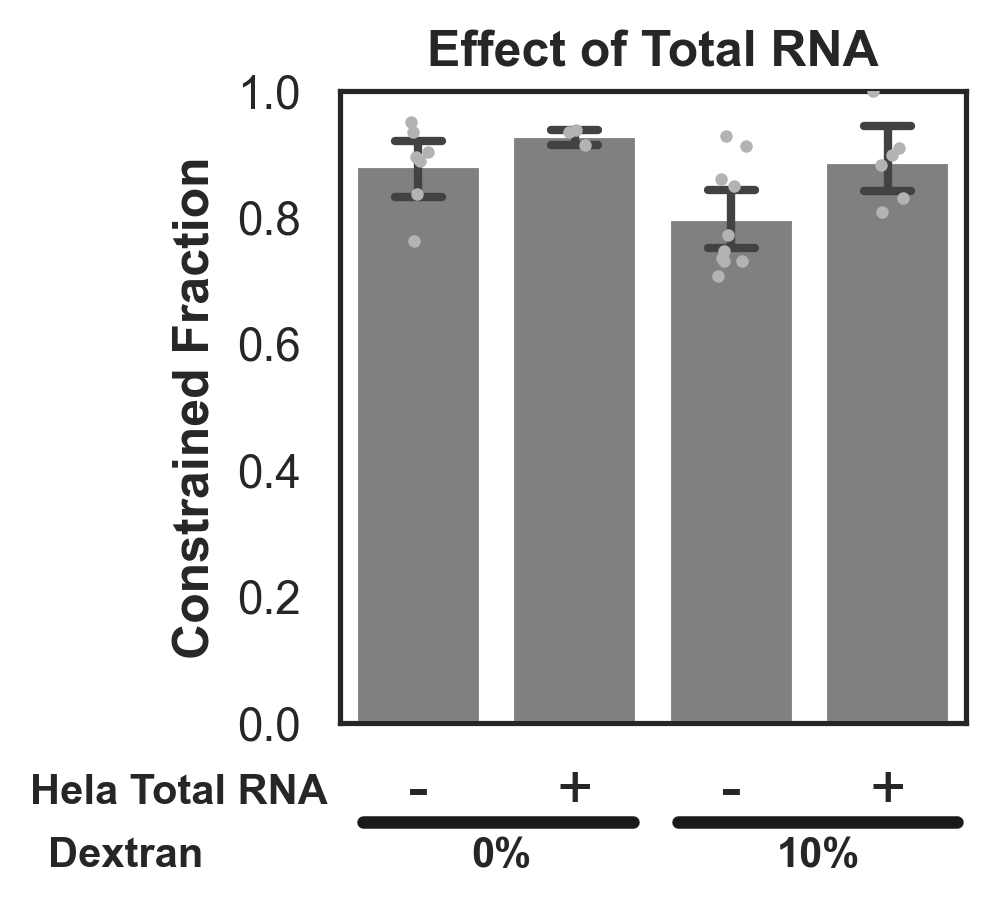

In [29]:
fig = plt.figure(figsize=(3, 3), dpi=300)
labels = [
    "0Dex, -, 0h",
    "0Dex, Hela, 0h",
    "10Dex, -, 0h",
    "10Dex, Hela, 0h",
]
df_fractions = data[data["label"].isin(labels)][["label", "Constrained"]]
ax = sns.barplot(
    data=df_fractions,
    x="label",
    y="Constrained",
    color="gray",
    errorbar="ci",
    errwidth=2,
    capsize=0.3,
)
ax = sns.stripplot(
    data=df_fractions,
    x="label",
    y="Constrained",
    color="0.7",
    size=3,
)
plt.title("Effect of Total RNA", weight="bold")
plt.ylim(0, 1)
plt.ylabel("Constrained Fraction", weight="bold")
ax.set_xticklabels(["-", "+", "-", "+"])
ax.xaxis.set_tick_params(labelsize=15)
plt.xlabel("")

fig.text(-0.1, 0.08, "Hela Total RNA", fontsize=10, weight="bold")

line_y = 0.06
fig.add_artist(lines.Line2D([0.27, 0.57], [line_y, line_y], c="k", lw=3))
fig.add_artist(lines.Line2D([0.62, 0.93], [line_y, line_y], c="k", lw=3))

second_row_y = 0.01
fig.text(-0.08, second_row_y, "Dextran", fontsize=10, weight="bold")
fig.text(0.39, second_row_y, "0%", fontsize=10, weight="bold")
fig.text(0.73, second_row_y, "10%", fontsize=10, weight="bold")

plt.tight_layout()
plt.savefig("Fig3_Fconstrained_compareRNA.png", format="png", bbox_inches="tight")
plt.show()